In [181]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat

In [183]:
train_df = pd.read_csv("../input/tabular-playground-series-jan-2021/train.csv")
test_df = pd.read_csv("../input/tabular-playground-series-jan-2021/test.csv")

In [184]:
train_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [186]:
train_df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [187]:
col = train_df.columns

In [188]:
col

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target'],
      dtype='object')

In [189]:
col = col[1:-1]
col

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

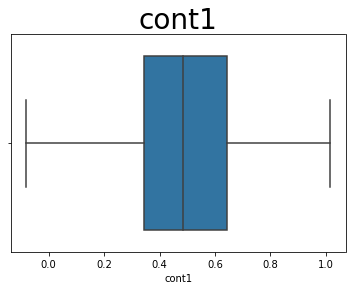

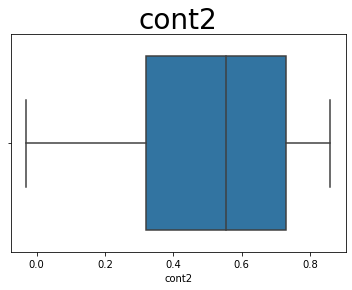

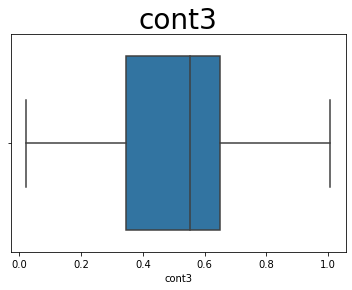

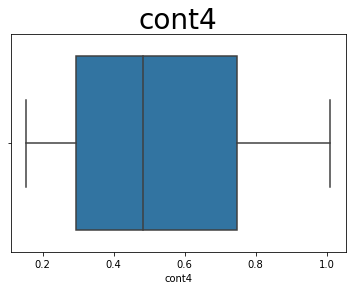

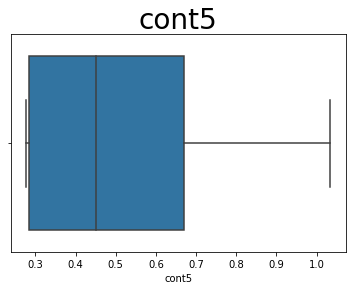

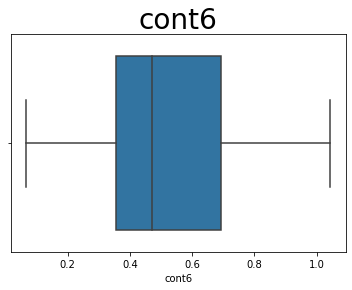

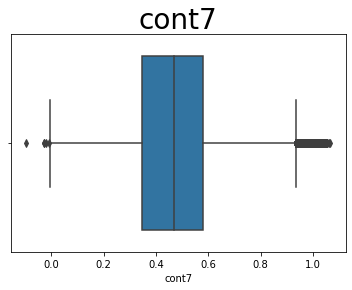

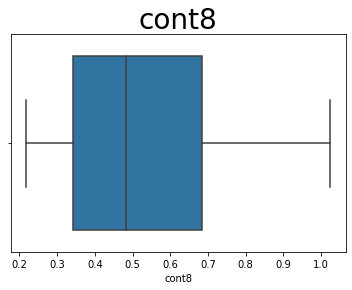

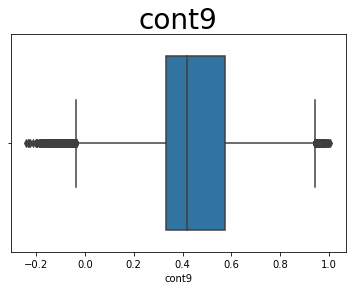

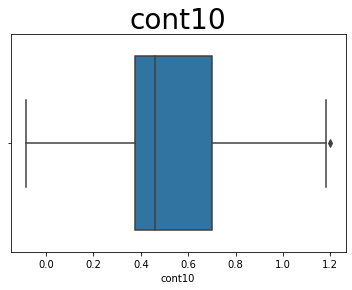

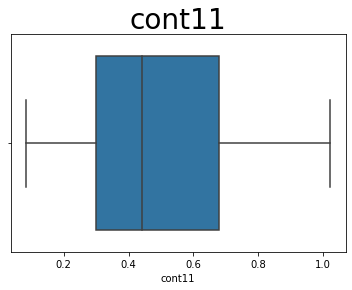

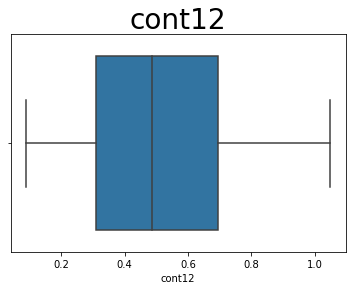

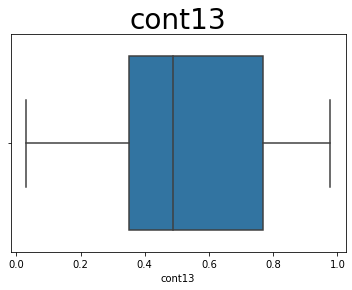

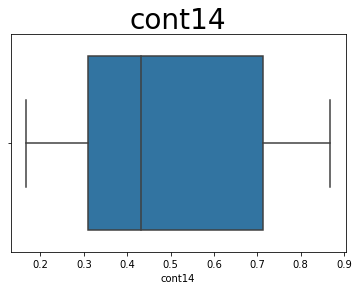

In [190]:
for c in col:
    sns.boxplot(data=train_df,x=c)
    plt.title(c,size=28)
    plt.show()

In [191]:
corr = train_df.corr()

In [192]:
plt.rcParams["figure.figsize"] = [15,7]

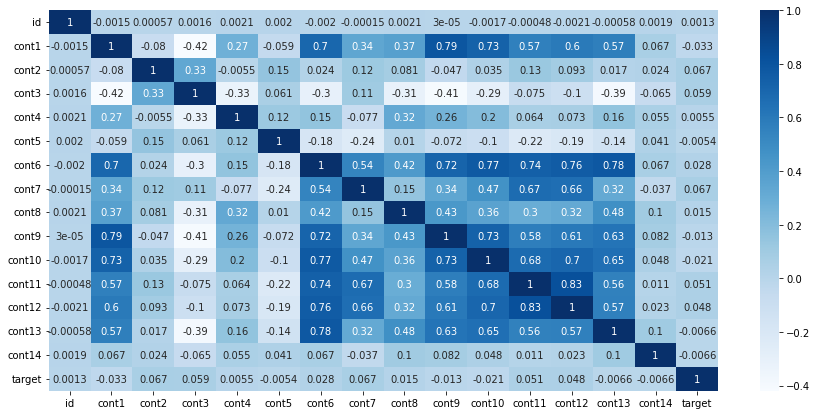

In [193]:
sns.heatmap(corr,cmap="Blues",annot=True)
plt.show()

In [194]:
#train_df.set_index("id",inplace=True)
train_df.drop("id",axis=1,inplace=True)
train_df

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750,7.385215
299996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984,7.242617
299997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552,9.592487
299998,0.481900,0.622346,0.540032,0.823118,0.283066,0.434283,0.174342,0.710843,0.358690,0.648272,0.984647,1.001110,0.063956,0.377693,8.207951


In [195]:
col

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [196]:
y = train_df['target']
X = train_df[col]

In [197]:
X

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750
299996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984
299997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552
299998,0.481900,0.622346,0.540032,0.823118,0.283066,0.434283,0.174342,0.710843,0.358690,0.648272,0.984647,1.001110,0.063956,0.377693


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


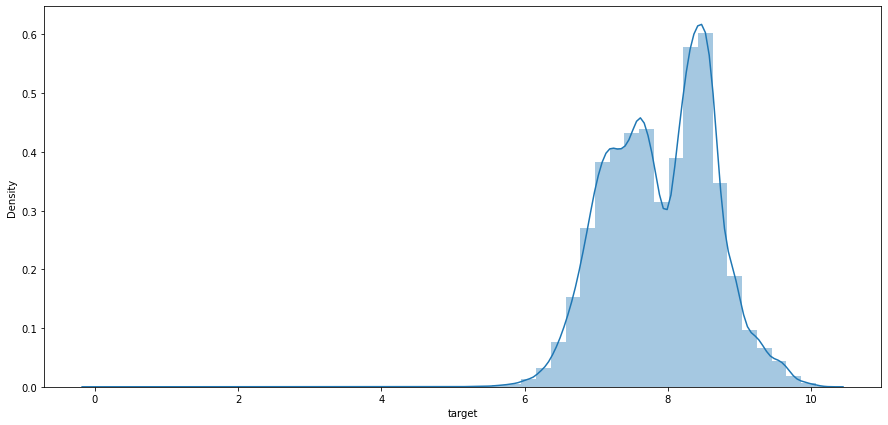

In [198]:
sns.distplot(y)
plt.show()

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.801649,1.373610,0.609709,-0.960763,-0.987330,1.511817,2.224295,-1.108223,0.500233,1.282542,1.989738,1.643756,1.415972,-0.952287
1,-0.582522,0.540001,0.819570,-0.062367,0.642352,-0.352030,0.126638,0.257074,-0.211112,-0.435466,-0.200171,-0.328417,-0.798695,-0.644595
2,1.608414,-1.185408,-1.095650,-0.953824,0.474930,1.388930,0.100794,0.155432,0.649496,1.499993,0.377497,0.780240,1.434278,-0.963641
3,1.538590,-1.480296,0.126164,0.902961,-0.994914,1.186702,1.462586,1.378696,0.582705,0.298782,1.298006,1.421650,1.570713,-1.076586
4,2.100275,-0.336005,-1.084608,1.564277,0.741222,1.393315,-0.004292,0.365339,2.108969,1.698726,2.270282,1.797637,1.664894,-0.326265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-1.421239,1.040358,0.633018,-1.116981,0.518034,-0.832086,-1.061163,-1.021205,-0.739799,1.684249,-0.765758,-1.183825,-0.291208,-1.032297
299996,0.190837,-1.458451,-1.497193,-1.397342,-0.646397,-0.643293,-0.674358,-0.836856,0.033498,-0.326728,-0.561952,-0.667381,-1.135711,0.558361
299997,-1.090678,1.506161,2.171778,-0.752247,-0.479124,-0.900100,0.208711,-1.226174,-0.415303,0.031670,0.035479,0.044541,-1.653770,1.012495
299998,-0.122432,0.545444,0.092017,1.319265,-0.992096,-0.423261,-1.731393,0.858746,-0.514364,0.632833,2.275155,2.257318,-2.130700,-0.605175


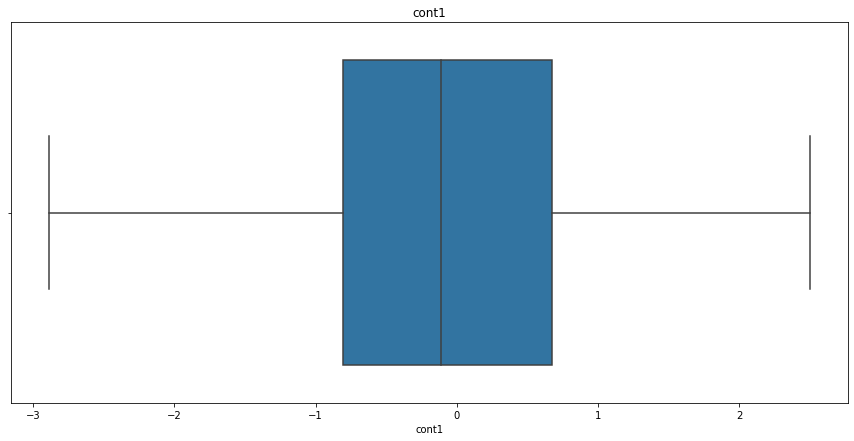

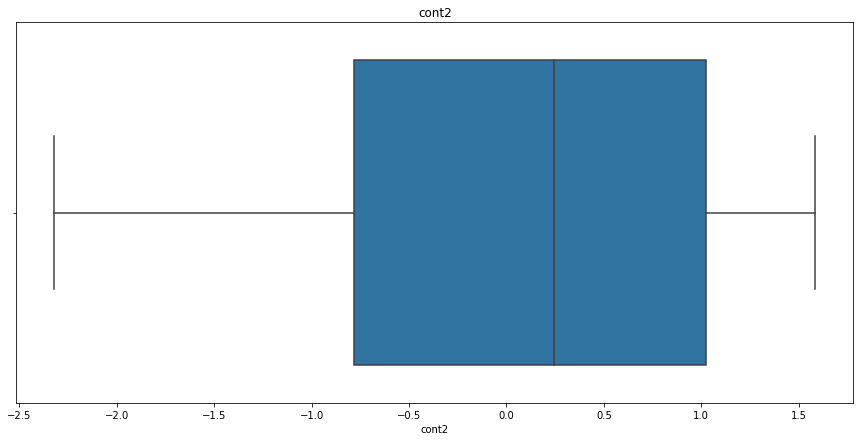

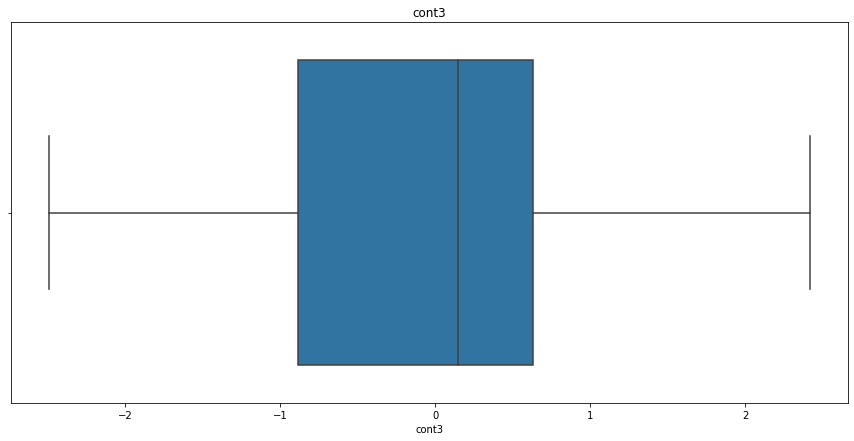

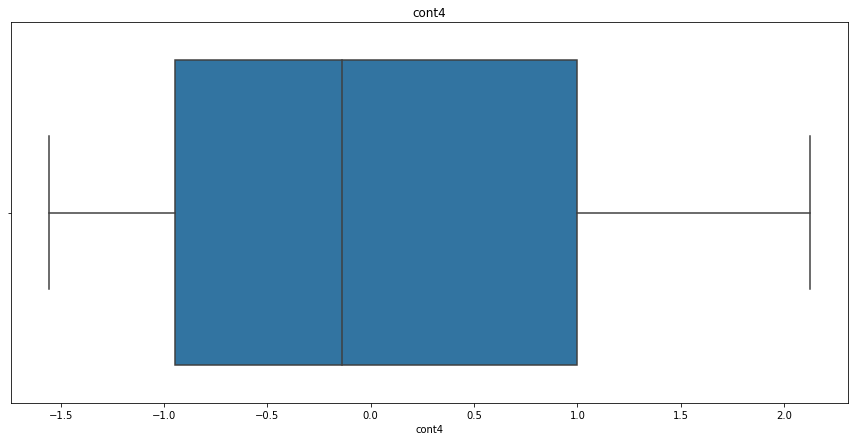

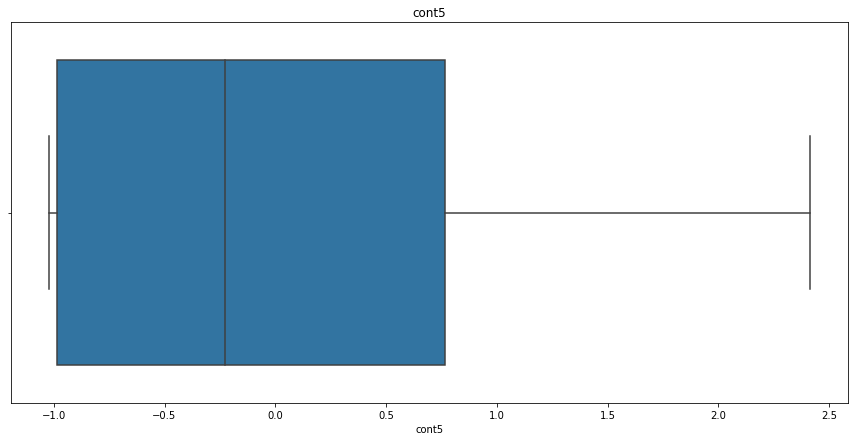

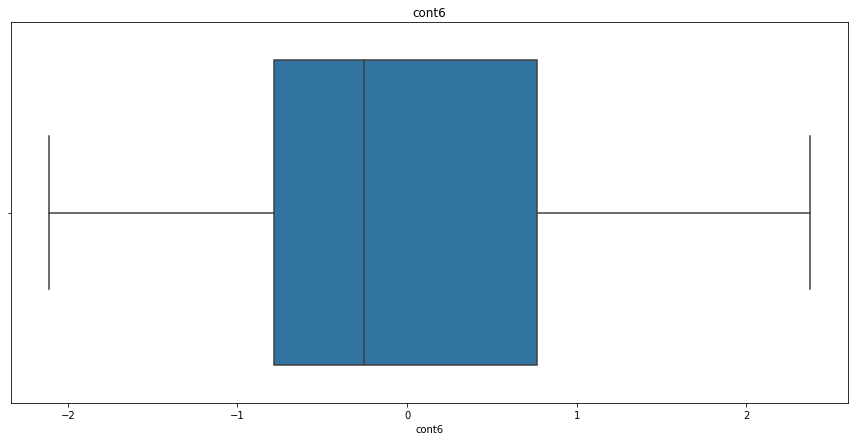

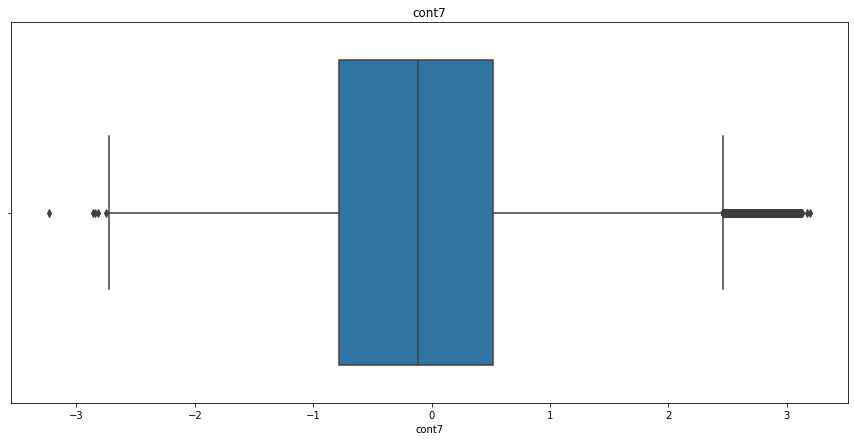

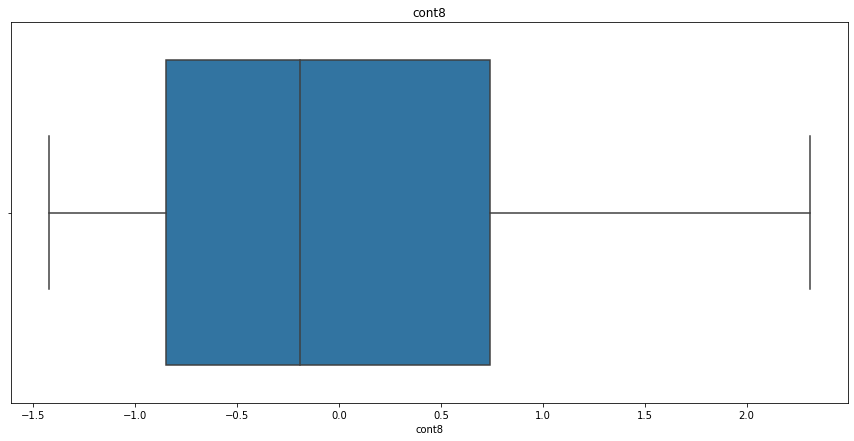

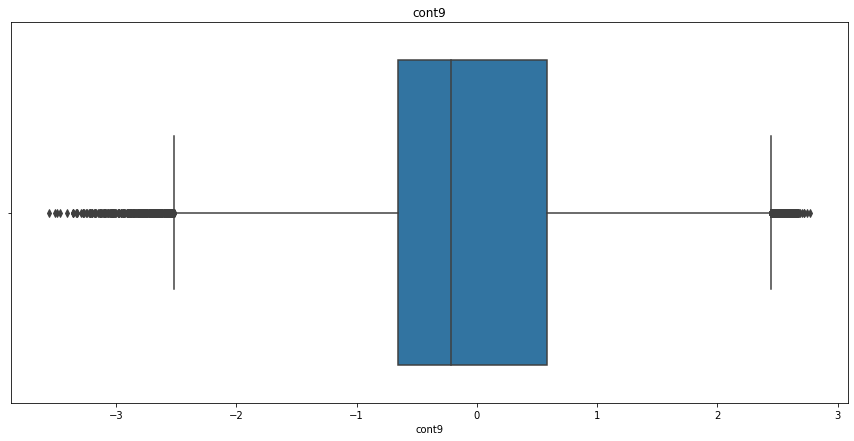

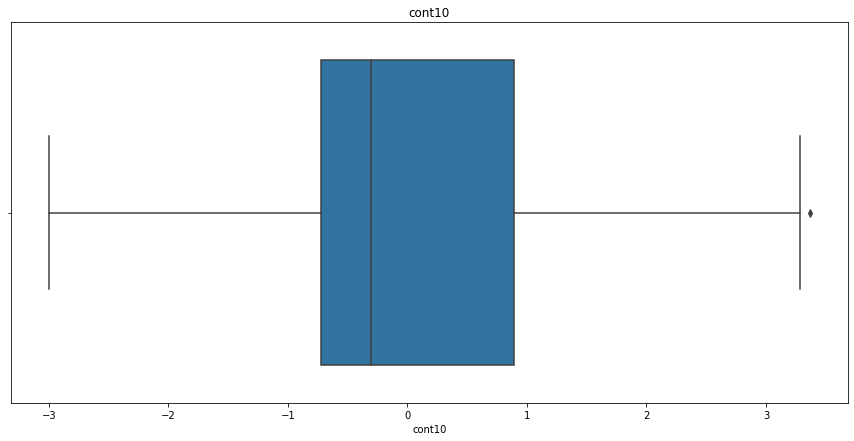

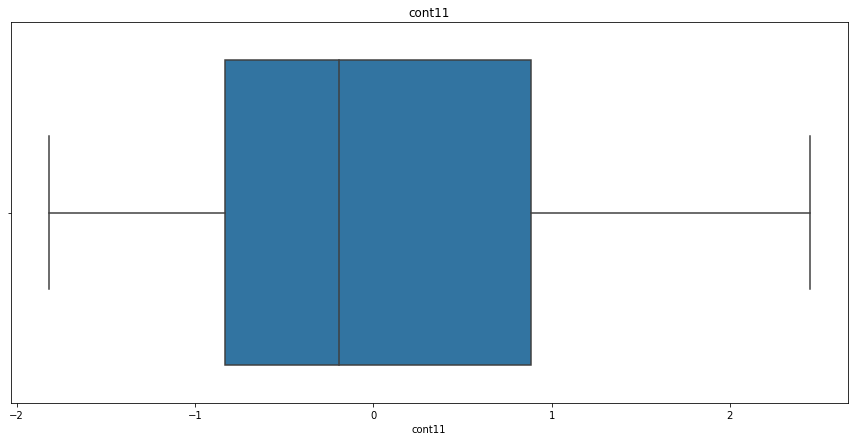

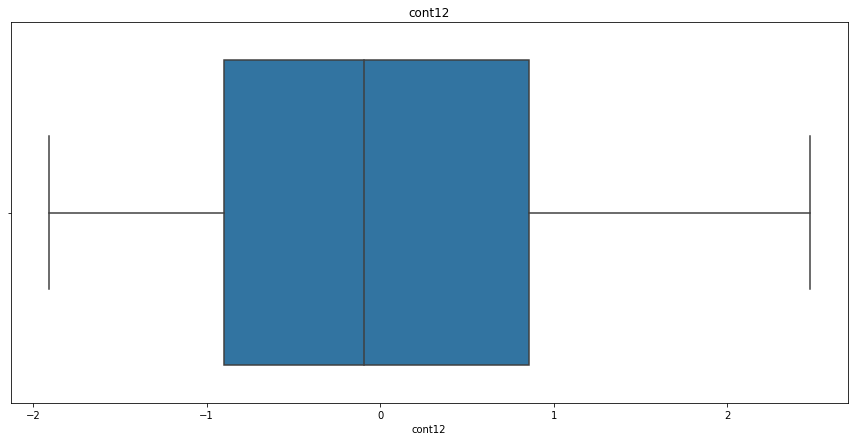

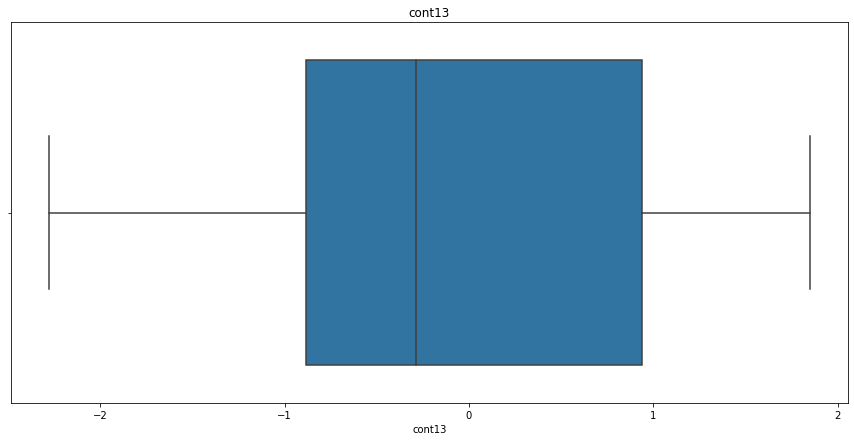

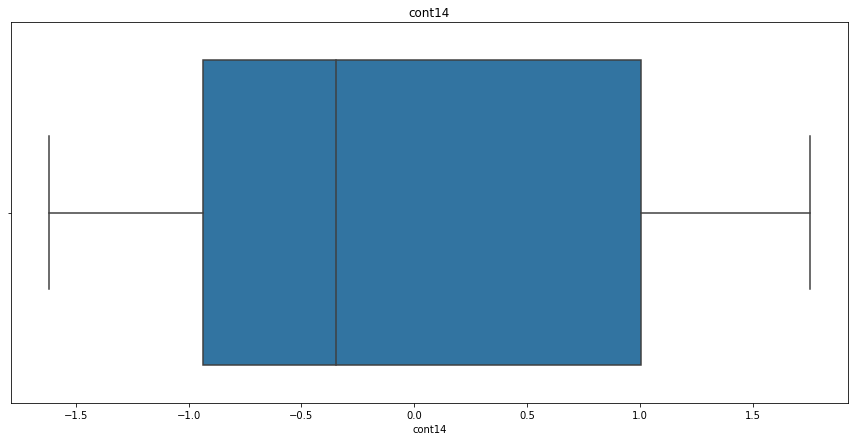

In [202]:
for c in col:
    sns.boxplot(data=X_scaled,x=c)
    plt.title(c)
    plt.show()

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=31,shuffle=True)

In [204]:
print(f'X_train size : {X_train.shape}\t y_train : {y_train.shape}\nX_test size : {X_test.shape}\t y_test : {y_test.shape}')

X_train size : (210000, 14)	 y_train : (210000,)
X_test size : (90000, 14)	 y_test : (90000,)


In [205]:
from sklearn.metrics import mean_squared_error,r2_score

In [206]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [209]:
from sklearn.model_selection import KFold,RepeatedKFold

# Linear Regression

In [210]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False`

## Simple Linear Regression

In [211]:
from sklearn.preprocessing import PolynomialFeatures

In [212]:
def model_linear(model,X,y):
    skf = KFold(n_splits=10, shuffle=True, random_state=31)
    train_error,val_error = [],[]
    for train_index, val_index in skf.split(X):
        X_train_fold, X_val_fold = X.loc[train_index], X.loc[val_index]
        y_train_fold, y_val_fold = y.loc[train_index], y.loc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        train_error.append(rmse(y_train_fold,y_train_pred))
        val_error.append(rmse(y_val_fold,y_val_pred))
    return train_error,val_error

In [213]:
def plot_loss(train_error,val_error):
    plt.plot(train_error,label="Train")
    plt.plot(val_error,label="Validation")
    plt.xlabel(xlabel="KFold",size=28)
    plt.ylabel(ylabel="RMSE",size=28)
    plt.title("Train vs Validation Loss",size=32)
    plt.legend("best")
    plt.grid(True)
    plt.show()

In [214]:
s_lr = LinearRegression(n_jobs=-1)

In [215]:
train_error,val_error = model_linear(s_lr,X_scaled,y)

In [216]:
print(stat.mean(val_error))

0.7262276453643989


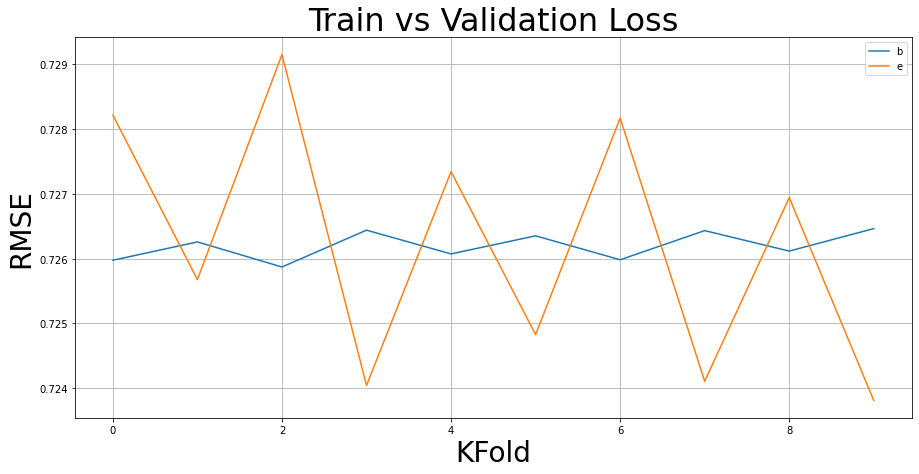

In [217]:
plot_loss(train_error,val_error)

In [218]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)

In [219]:
print(f'RMSE score : {rmse(y_test,lr_y_pred)}')

RMSE score : 0.7276749379044071


In [220]:
from sklearn.pipeline import Pipeline

0.7191901742566263


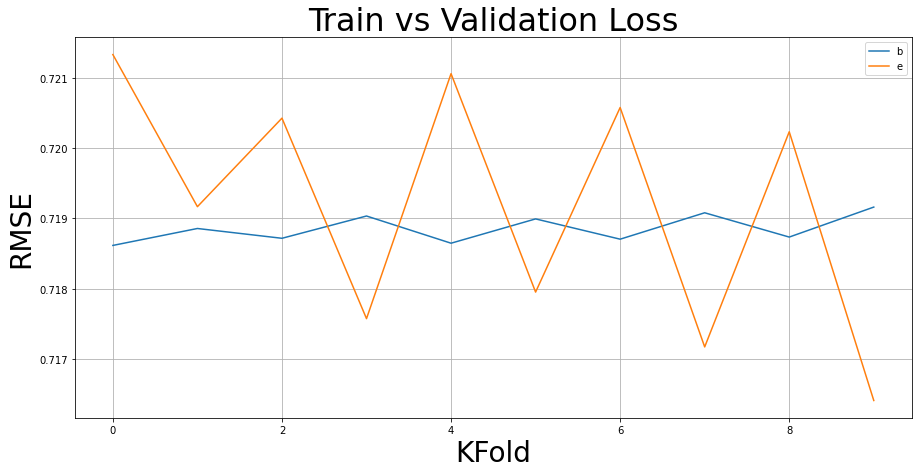

In [221]:
polynomial_regression = Pipeline((
("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
('lin_reg',LinearRegression())))
train_error,val_error = model_linear(polynomial_regression,X_scaled,y)
print(stat.mean(val_error))
plot_loss(train_error,val_error)

In [222]:
polynomial_regression.fit(X_train,y_train)
lr_quad_y_pred = polynomial_regression.predict(X_test)
print(f'RMSE score : {rmse(y_test,lr_quad_y_pred)}')

RMSE score : 0.7203540475366769


0.7151488729890455


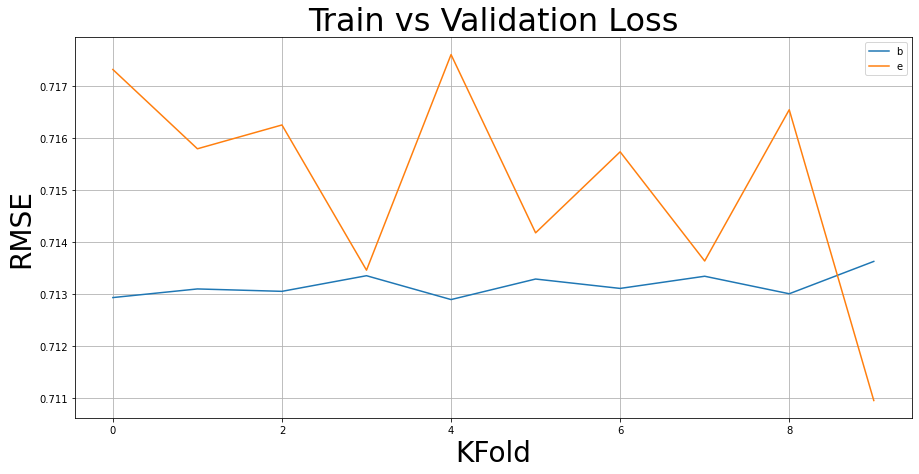

In [224]:
polynomial_regression = Pipeline((
("poly_features",PolynomialFeatures(degree=3,include_bias=False)),
('lin_reg',LinearRegression())))
train_error,val_error = model_linear(polynomial_regression,X_scaled,y)
print(stat.mean(val_error))
plot_loss(train_error,val_error)

In [225]:
polynomial_regression.fit(X_train,y_train)
lr_pol3_y_pred = polynomial_regression.predict(X_test)
print(f'RMSE score : {rmse(y_test,lr_pol3_y_pred)}')

RMSE score : 0.7168188289557672


In [227]:
polynomial_regression.fit(X_train,y_train)
lr_pol3_test_pred = polynomial_regression.predict(test_df.drop(['id'],axis=1))

In [228]:
ans = pd.DataFrame({"id": test_df["id"], "target": lr_pol3_test_pred})
ans["id"] = ans["id"].astype(int)
# converting to submission file. Since we have set the id col, setting index = False
ans.to_csv("submission.csv", index=False)

## Ridge Regression

In [ ]:
RepeatedKFold?

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=31)

In [ ]:
grid = dict()
grid['alpha'] = np.arange(0,100000,10)

In [ ]:
rdg = Ridge(max_iter=1000)

In [ ]:
search = GridSearchCV(rdg,grid,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)

In [ ]:
results = search.fit(X_scaled,y)

In [ ]:
results.best_score_

In [ ]:
results.best_params_

In [ ]:
#pred

In [ ]:
#rmse()

In [ ]:
ans = pd.DataFrame({"id": test_df["id"], "target": pred})
ans["id"] = ans["id"].astype(int)
# converting to submission file. Since we have set the id col, setting index = False
ans.to_csv("submission.csv", index=False)
